# Function Optimization using Tabu Search

## Himmelblau's function
$f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$

The Himmelblau function has four identical local minima at:
* f(3.0, 2.0)=0
* f(−2.805118, 3.131312)=0
* f(−3.779310, −3.283186)=0
* f(3.584428, −1.848126)=0

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


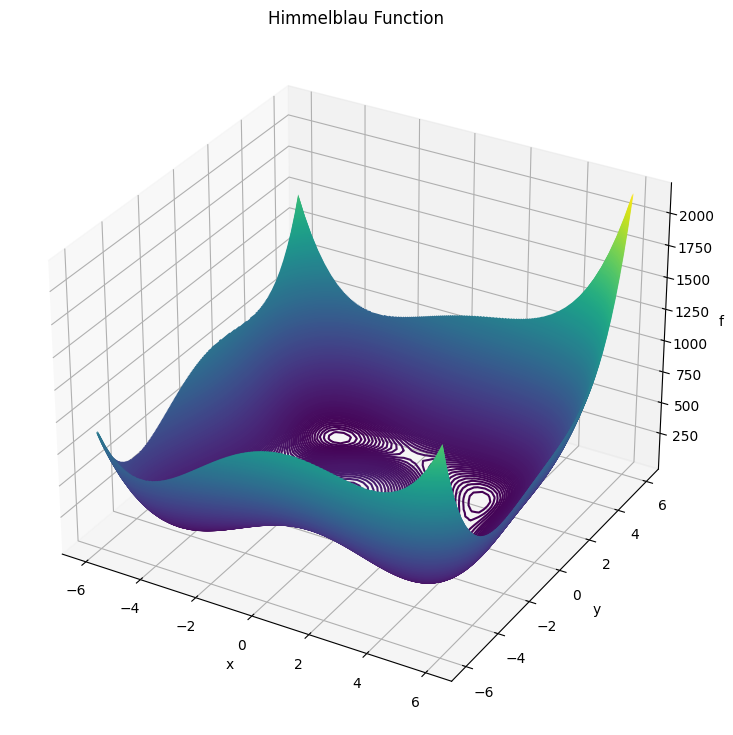

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d 

# Define the objective function
def Himmelblau(x,y):
       return (((x**2+y-11)**2) + (((x+y**2-7)**2)))

X=np.linspace(-6,6)
Y=np.linspace(-6,6)

x,y=np.meshgrid(X,Y)
f=Himmelblau(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,f,450)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
ax.set_title('Himmelblau Function')
plt.show()
#plt.savefig('CH06_F07_Himmelblau.png', format='png', dpi=300)

In [2]:
# # !pip install optalgotools

# # or add optalgotools to the system path
# import sys
# sys.path.insert(0, '../')

In [3]:
from optalgotools.algorithms import TabuSearch
from optalgotools.problems import ProblemBase, ContinuousFunctionBase

In [4]:
# Define the bounds
Himmelblau_bounds = np.asarray([[-6, 6], [-6, 6]])

# Create a continous function object
Himmelblau_obj = ContinuousFunctionBase(Himmelblau, Himmelblau_bounds)

# Define TS solver. Adding debug = 1 to print initial and final solution
ts = TabuSearch(max_iter=100, tabu_tenure=5, neighbor_size=50, use_aspiration=True, aspiration_limit=2, use_longterm=False, debug=1)

# Run the solver
ts.run(Himmelblau_obj)

Tabu search is initialized:
current value = 148.3217674694377
Tabu search is done: 
curr iter: 100, curr best value: 0.005569730862620958, curr best: sol: [3.00736837 1.98045825], found at iter: 21


## Mishra's Bird Function
$f(x,y)=sin(x)e^{(1-cos(y))^2}+cos(y)e^{(1-sin(x))^2}+(x-y)^2$

Subject to this constraint: $(x+5)^2+(y+5)^2<25$

This function has two global minima at f(x*)= −106.764537 located at (4.70104 ,3.15294) and (−1.58214 ,−3.13024). 

The search domain is usually: $-10 \le x \le 0$ and $-6.5 \le y \le 0$

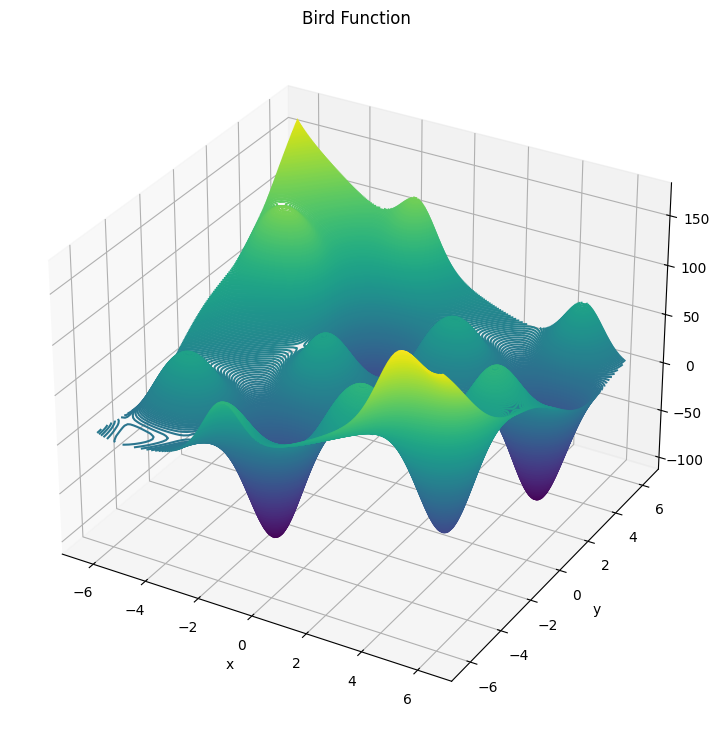

In [5]:
import math

def Bird(x,y):
 return np.sin(x)*(np.exp(1-np.cos(y))**2)+np.cos(y)*(np.exp(1-np.sin(x))**2)+(x-y)**2

X=np.linspace(-2*math.pi,2*math.pi,100)
Y=np.linspace(-2*math.pi,2*math.pi,100)

x,y=np.meshgrid(X,Y)
f=Bird(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,f,450)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
ax.set_title('Bird Function')
plt.show()

In [6]:
# Define the bounds
Bird_bounds = np.asarray([[-10,0], [-6.5,0]])

# Create a continous function object
Bird_obj = ContinuousFunctionBase(Bird, Bird_bounds)

# Define TS solver. Adding debug = 1 to print initial and final solution
ts = TabuSearch(max_iter=100, tabu_tenure=5, neighbor_size=50, use_aspiration=False, use_longterm=False, debug=1)

# Run the solver
ts.run(Bird_obj)

soln=ts.s_best

# Check violation of the constraint and keep running the solver until a feasible solution is found
while ((soln[0]+5)**2+(soln[1]+5)**2) >= 25:
    ts.run(Bird_obj)
    soln=ts.s_best

print('Feasible solution')
print(soln)
print('Best value of the objective value is', ts.val_allbest)

Tabu search is initialized:
current value = 5.7757653852993025
Tabu search is done: 
curr iter: 100, curr best value: -106.78417391478288, curr best: sol: [-1.59535697 -3.1199216 ], found at iter: 71
Feasible solution
[-1.59535697 -3.1199216 ]
Best value of the objective value is -106.78417391478288
